# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src='assets/bricks.jpg'>

# Import Statements

In [233]:
import pandas as pd

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [265]:
df = pd.read_csv('data/colors.csv')

In [266]:
df.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [236]:
df['name'].nunique()

231

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [237]:
df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,187,187,187
t,44,44,44


In [238]:
df.is_trans.value_counts()

f    187
t     44
Name: is_trans, dtype: int64

**Challenge**: Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets

### Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src='https://i.imgur.com/aKcwkSx.png'> 

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src='https://i.imgur.com/whB1olq.png'> 

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [267]:
set_df = pd.read_csv('data/sets.csv')
set_df.head()

,set_num,name,year,theme_id,num_parts,img_url
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg


In [268]:
set_df.tail()

,set_num,name,year,theme_id,num_parts,img_url
21795,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
21796,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...
21797,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
21798,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
21799,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0,https://cdn.rebrickable.com/media/sets/zx8000-...


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [269]:
set_df.year.min()

1949

**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [270]:
set_df[set_df.year == set_df.year.min()]

,set_num,name,year,theme_id,num_parts,img_url
13103,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
13116,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
13121,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...
13127,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
13128,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [271]:
set_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts,img_url
4288,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
401,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
20557,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...
387,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
368,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [272]:
set_year_on_year = set_df.groupby('year').count()
set_year_on_year.head()

,set_num,name,theme_id,num_parts,img_url
year,,,,,
1949,5,5,5,5,5
1950,6,6,6,6,6
1953,4,4,4,4,4
1954,14,14,14,14,14
1955,39,39,39,39,39


In [273]:
set_year_on_year.tail()

,set_num,name,theme_id,num_parts,img_url
year,,,,,
2020,1035,1035,1035,1035,1035
2021,1147,1147,1147,1147,1147
2022,1022,1022,1022,1022,1022
2023,863,863,863,863,863
2024,5,5,5,5,5


In [274]:
set_year_on_year.loc[2019]

set_num      1035
name         1035
theme_id     1035
num_parts    1035
img_url      1035
Name: 2019, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

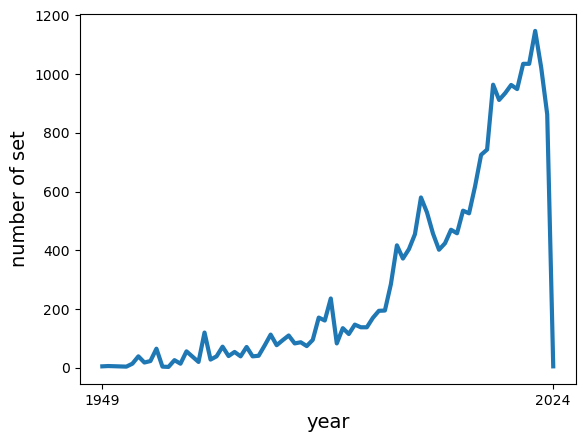

In [275]:
from matplotlib import pyplot as plt

plt.Figure(figsize=(8, 4), dpi=200)
plt.plot(set_year_on_year.index, set_year_on_year.set_num, linewidth=3)
plt.xlabel('year', fontsize=14), plt.ylabel('number of set', fontsize=14)
plt.xticks((set_year_on_year.index.min(), set_year_on_year.index.max()))
plt.show()

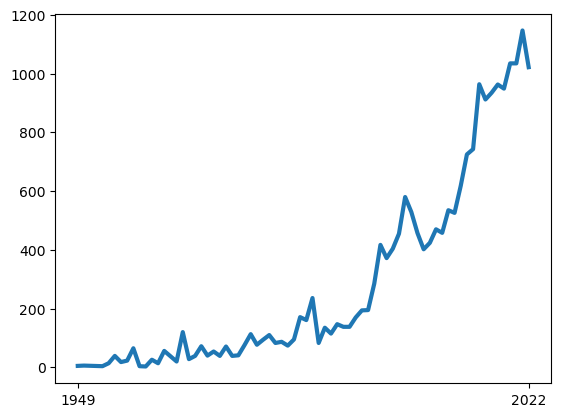

In [276]:
set_year_on_year = set_year_on_year[:-2]

plt.Figure(figsize=(8, 4), dpi=200)
plt.plot(set_year_on_year.index, set_year_on_year.set_num, linewidth=3)
plt.xticks((set_year_on_year.index.min(), set_year_on_year.index.max()))
plt.show()

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [277]:
theme_year_on_year = set_df.groupby('year').agg({'theme_id': pd.Series.nunique})[:-2]
theme_year_on_year.rename(columns={'theme_id': 'numb_theme'}, inplace=True)
theme_year_on_year.head()

,numb_theme
year,
1949,2
1950,1
1953,2
1954,2
1955,6


In [278]:
theme_year_on_year.tail()

,numb_theme
year,
2018,101
2019,95
2020,100
2021,93
2022,86


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

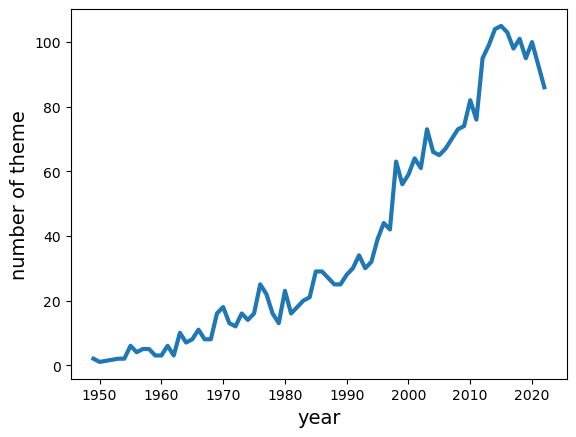

In [279]:
plt.Figure(figsize=(8, 4), dpi=200)
plt.plot(theme_year_on_year.index, theme_year_on_year.numb_theme, linewidth=3)
plt.xlabel('year', fontsize=14), plt.ylabel('number of theme', fontsize=14)
plt.show()

### Line Charts with Two Seperate Axes

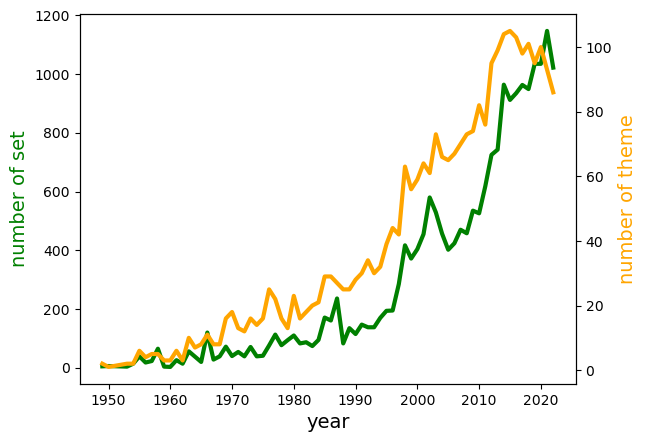

In [280]:
plt.Figure(figsize=(8, 4), dpi=200)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(set_year_on_year.index, set_year_on_year.set_num, linewidth=3, c='green')
ax2.plot(theme_year_on_year.index, theme_year_on_year.numb_theme, linewidth=3, c='orange')

ax1.set_xlabel('year', fontsize=14) 
ax1.set_ylabel('number of set', fontsize=14, c='green')
ax2.set_ylabel('number of theme', fontsize=14, c='orange') 
plt.show()

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [281]:
num_part_ave = set_df.groupby('year').agg({'num_parts': pd.Series.mean})[:-2]
num_part_ave.rename(columns={'num_parts': 'ave_num_parts'}, inplace=True)
num_part_ave.head()

,ave_num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,12.205128


In [282]:
num_part_ave.tail()

,ave_num_parts
year,
2018,180.954689
2019,185.566184
2020,204.973913
2021,231.466434
2022,274.855186


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

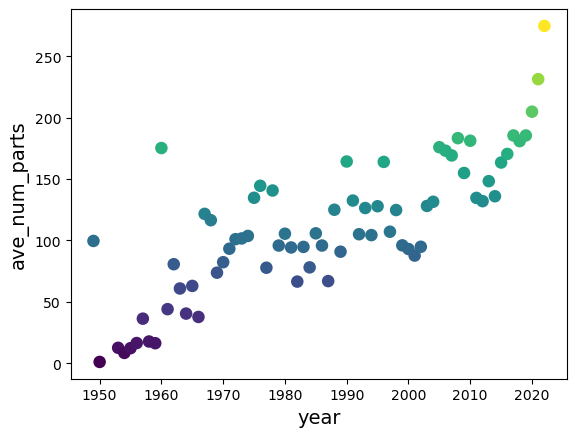

In [283]:
plt.Figure(figsize=(8, 4), dpi=200)
plt.scatter(num_part_ave.index, num_part_ave.ave_num_parts, linewidth=3,c=num_part_ave.ave_num_parts)
plt.xlabel('year', fontsize=14), plt.ylabel('ave_num_parts', fontsize=14)
plt.show()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [284]:
set_theme_count = set_df.theme_id.value_counts()
set_theme_count

497    946
158    890
503    694
494    549
501    533
      ... 
510      1
415      1
411      1
156      1
414      1
Name: theme_id, Length: 459, dtype: int64

<img src='https://i.imgur.com/Sg4lcjx.png'>

In [285]:
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [286]:
star_war = themes[themes.name == 'Star Wars']
star_war

,id,name,parent_id
5,18,Star Wars,1.0
75,158,Star Wars,NaN
96,209,Star Wars,207.0
126,261,Star Wars,258.0


In [287]:
set_df[set_df.theme_id == 18]


,set_num,name,year,theme_id,num_parts,img_url
12174,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1,https://cdn.rebrickable.com/media/sets/65081-1...
16243,8000-1,Pit Droid,2000,18,223,https://cdn.rebrickable.com/media/sets/8000-1.jpg
16250,8001-1,Battle Droid,2000,18,336,https://cdn.rebrickable.com/media/sets/8001-1.jpg
16261,8002-1,Destroyer Droid,2000,18,567,https://cdn.rebrickable.com/media/sets/8002-1.jpg
16292,8007-1,C-3PO,2001,18,339,https://cdn.rebrickable.com/media/sets/8007-1.jpg
16293,8008-1,Stormtrooper,2001,18,361,https://cdn.rebrickable.com/media/sets/8008-1.jpg
16294,8009-1,R2-D2,2002,18,239,https://cdn.rebrickable.com/media/sets/8009-1.jpg
16295,8010-1,Darth Vader,2002,18,388,https://cdn.rebrickable.com/media/sets/8010-1.jpg
16307,8011-1,Jango Fett,2002,18,425,https://cdn.rebrickable.com/media/sets/8011-1.jpg
16310,8012-1,Super Battle Droid,2002,18,378,https://cdn.rebrickable.com/media/sets/8012-1.jpg


In [288]:
set_df[set_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts,img_url
14907,75023-1,Star Wars Advent Calendar 2013,2013,209,254,https://cdn.rebrickable.com/media/sets/75023-1...
14940,75056-1,Star Wars Advent Calendar 2014,2014,209,275,https://cdn.rebrickable.com/media/sets/75056-1...
14974,75097-1,Star Wars Advent Calendar 2015,2015,209,291,https://cdn.rebrickable.com/media/sets/75097-1...
15025,75146-1,Star Wars Advent Calendar 2016,2016,209,282,https://cdn.rebrickable.com/media/sets/75146-1...
15067,75184-1,Star Wars Advent Calendar 2017,2017,209,309,https://cdn.rebrickable.com/media/sets/75184-1...
15100,75213-1,Star Wars Advent Calendar 2018,2018,209,307,https://cdn.rebrickable.com/media/sets/75213-1...
15139,75245-1,Star Wars Advent Calendar 2019,2019,209,280,https://cdn.rebrickable.com/media/sets/75245-1...
15175,75279-1,Star Wars Advent Calendar 2020,2020,209,311,https://cdn.rebrickable.com/media/sets/75279-1...
15201,75307-1,Star Wars Advent Calendar 2021,2021,209,336,https://cdn.rebrickable.com/media/sets/75307-1...
15238,75340-1,Star Wars Advent Calendar 2022,2022,209,329,https://cdn.rebrickable.com/media/sets/75340-1...


In [289]:
set_df[set_df.theme_id == 158]

,set_num,name,year,theme_id,num_parts,img_url
2106,20006-1,Clone Turbo Tank,2008,158,64,https://cdn.rebrickable.com/media/sets/20006-1...
2117,20007-1,Republic Attack Cruiser,2009,158,84,https://cdn.rebrickable.com/media/sets/20007-1...
2130,20009-1,AT-TE Walker,2009,158,94,https://cdn.rebrickable.com/media/sets/20009-1...
2132,20010-1,Republic Gunship,2009,158,94,https://cdn.rebrickable.com/media/sets/20010-1...
2139,20016-1,Imperial Shuttle,2010,158,70,https://cdn.rebrickable.com/media/sets/20016-1...
...,...,...,...,...,...,...
21759,VP-4,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-4.jpg
21762,VP-8,Star Wars Co-Pack,2000,158,0,https://cdn.rebrickable.com/media/sets/vp-8.jpg
21795,XWING-1,Mini X-Wing Fighter,2019,158,60,https://cdn.rebrickable.com/media/sets/xwing-1...
21796,XWING-2,X-Wing Trench Run,2019,158,52,https://cdn.rebrickable.com/media/sets/xwing-2...


In [290]:
set_df[set_df.theme_id == 261]

,set_num,name,year,theme_id,num_parts,img_url
19649,9748-1,Droid Developer Kit,1999,261,658,https://cdn.rebrickable.com/media/sets/9748-1.jpg
19655,9754-1,Dark Side Developer Kit,2000,261,578,https://cdn.rebrickable.com/media/sets/9754-1.jpg


### Merging (i.e., Combining) DataFrames based on a Key


In [291]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count':set_theme_count.values})
set_theme_count

,id,set_count
0,497,946
1,158,890
2,503,694
3,494,549
4,501,533
...,...,...
454,510,1
455,415,1
456,411,1
457,156,1


In [292]:
merged_df = pd.merge(set_theme_count, themes, on="id")
merged_df

,id,set_count,name,parent_id
0,497,946,Books,NaN
1,158,890,Star Wars,NaN
2,503,694,Key Chain,501.0
3,494,549,Friends,NaN
4,501,533,Gear,NaN
...,...,...,...,...
454,510,1,Boat,507.0
455,415,1,Coast Guard,411.0
456,411,1,Legoland,NaN
457,156,1,Mini,155.0


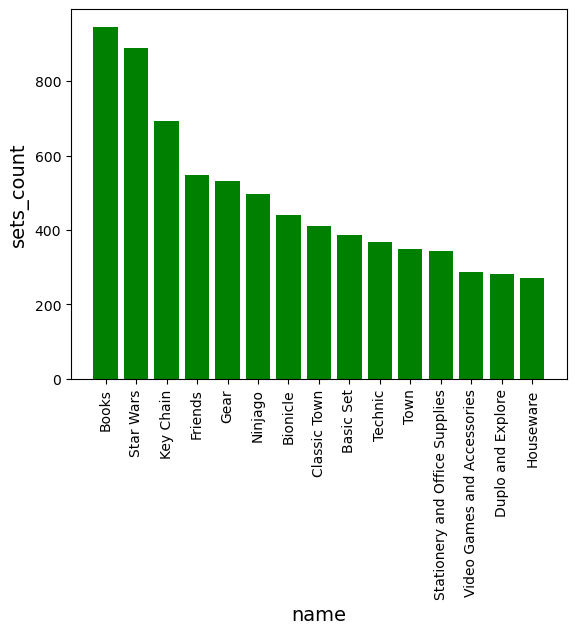

In [296]:
plt.Figure(figsize=(8, 4), dpi=200)
plt.bar(merged_df.name[:16], merged_df.set_count[:16], color='green')
plt.xlabel('name', fontsize=14)
plt.ylabel('sets_count', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.show()